This example showcases the Influence function 'SimilarityAdoption'

In [1]:
import defSim as ds
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# The classic Axelrod (1997) model with homophily

Below we implement a simulation model exactly as in [1].

  * 100 agents
  * Set on a wrapped square lattice
  * Von Neumann neighborhoods (i.e. every agent has 4 neighbors)
  * Each agent has 5 Features (F) with one of 15 possible traits (Q)
 
We add a parameter for *homophily*: $h$ following [2]. This parameter governs the probability of succesful interaction, as a function of cultural overlap. To be precise:

$$ p_{ij} = (overlap_{ij}) ^ h $$

At $h=1$, the relationship between interaction probabiliy and cultural overlap is linear, like in Axelrod's original implementation. For values of $h$ where $0 < h < 1$, this relationship is concave, and when $h>1$ the relationship is convex.

This plot shows how the homophily parameter manipulates the probability of successful influence as a function of the overlap in the agents' feature vector:

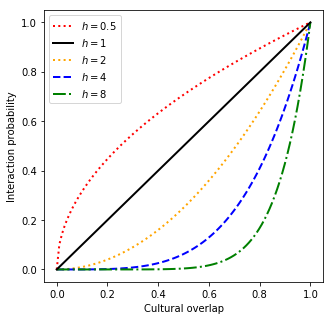

In [2]:
x = np.linspace(0,1,100)
hom05 = x ** 0.5
hom1 = x ** 1
hom2 = x ** 2
hom4 = x ** 4
hom8 = x ** 8

fig, ax = plt.subplots(figsize=[5, 5])

ax.plot(x, hom05, 'red', ls=":", lw=2)
ax.plot(x, hom2, 'orange', ls=":", lw=2)
ax.plot(x, hom4, 'blue', ls="--", lw=2)
ax.plot(x, hom8, 'green', ls="-.", lw=2)
ax.plot(x, hom1, 'black', ls="-", lw=2)

custom_lines = [Line2D([0], [0], color='red', ls=":", lw=2),
                Line2D([0], [0], color='black', ls='-', lw=2),
                Line2D([0], [0], color='orange', ls=':', lw=2),
                Line2D([0], [0], color='blue', ls='--', lw=2),
                Line2D([0], [0], color='green', ls='-.', lw=2)]
ax.legend(custom_lines, [r'$h=0.5$', r'$h=1$', r'$h=2$', r'$h=4$', r'$h=8$'])

plt.ylabel("Interaction probability")
plt.xlabel("Cultural overlap")

plt.show()

### The simulation experiment

In [3]:
exp = ds.Experiment(seed=314,                                            # make run  replicable
                    influence_function="similarity_adoption",            # our name for Axelrod's influence function
                    attributes_initializer="random_categorical",         # agent features receive integer values
                    attribute_parameters={"num_features": 5,             # originally: F
                                          "num_traits": 15},             # originally: Q
                    influence_parameters={"homophily": [0.5, 1, 2]},     # pass to the influence function
                    topology="grid",                                     # i.e. a wrapped lattice
                    network_parameters={"neighborhood": "von_neumann",   # pass to network generator
                                        "num_agents": 100},              # N
                    communication_regime=["one-to-one", "one-to-many"],  # how many neighbors to influence at once
                    output_realizations=["AverageDistance", "Homogeneity", "Regions", "Isolates", 
                                         "SuccessfullInfluence", "Ticks"],  # define what output columns we want
                    stop_condition="strict_convergence",                 # only stop when all distances either 0 or 1
                    max_iterations=1000000,                              # max iterations, just in case
                    repetitions=10)                                      # number of repetitions per condition

my_results = exp.run(parallel=True)    # now, RUN the experiment

60 different parameter combinations


First, let's check whether all runs have converged:

It looks like they did! 

Now, we can plot what the effect of this *homophily* parameter is on the diversity of available feature vectors in the simulations we ran. We will look at **average distance** between all agents, and at the **number of culturally distinct regions**, that is, the number of clusters of connected agents with a perfecly similar feature vector. 

It looks like they did! 

Now, we can plot what the effect of this *homophily* parameter is on the diversity of available feature vectors in the simulations we ran. We will look at **average distance** between all agents, and at the **number of culturally distinct regions**, that is, the number of clusters of connected agents with a perfecly similar feature vector. We also look at the **average homogeneity** in the graph measured as the proportional size of the biggest cluster in a given run ($S_{max} / N$).

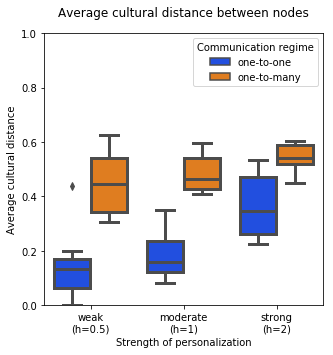

In [9]:
plt.figure(figsize=[5, 5])

plt.title('Average cultural distance between nodes', y=1.04)
ax = sns.boxplot(x="homophily", y="AverageDistance", hue="communication_regime",
                 data=my_results, palette='bright', linewidth=3)
ax.legend().set_title('Communication regime')
ax.set(ylim=[0, 1],
       xlabel='Strength of personalization', 
       ylabel='Average cultural distance',
       xticklabels=['weak\n(h=0.5)', 'moderate\n(h=1)', 'strong\n(h=2)'])

plt.show()

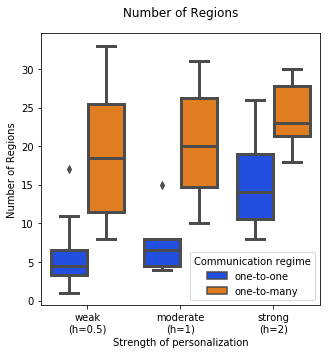

In [11]:
plt.figure(figsize=[5, 5])

plt.title('Number of Regions', y=1.04)
ax = sns.boxplot(x="homophily", y="Regions", hue="communication_regime",
                 data=my_results, palette='bright', linewidth=3)
ax.legend().set_title('Communication regime')
ax.set(#ylim=[1, 100],
       xlabel='Strength of personalization', 
       ylabel='Number of Regions',
       xticklabels=['weak\n(h=0.5)', 'moderate\n(h=1)', 'strong\n(h=2)'])

plt.show()

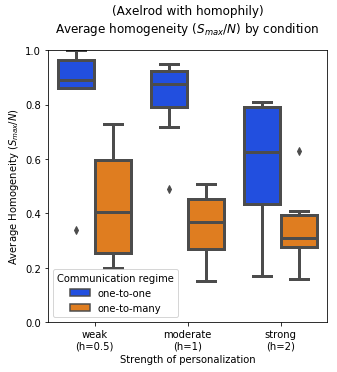

In [12]:
plt.figure(figsize=[5, 5])

plt.title(r'Average homogeneity ($S_{max} / N$) by condition', y=1.04)
ax = sns.boxplot(x="homophily", y="Homogeneity", hue="communication_regime",
                 data=my_results, palette='bright', linewidth=3)
ax.legend().set_title('Communication regime')
ax.set(ylim=[0, 1],
       xlabel='Strength of personalization', 
       ylabel=r'Average Homogeneity ($S_{max} / N)$',
       xticklabels=['weak\n(h=0.5)', 'moderate\n(h=1)', 'strong\n(h=2)'])

plt.show()

---

**References**

[1] ﻿Axelrod, Robert M. 1997. “The Dissemination of Culture: A Model with Local Convergence and Global Polarization.” *Journal of Conflict Resolution* 41(2):203–26.

[2] ﻿Takács, Károly, Andreas Flache, and Michael Mäs. 2016. “Discrepancy and Disliking Do Not Induce Negative Opinion Shifts.” *PLoS One* 11(6):1–21.